# Kaggle Titanic with PyTorch

## Preparing the Data

In [1]:
import pandas as pd
import torch as th
import matplotlib.pyplot as plt

test = pd.read_csv("test.csv")
test_shape = test.shape
print(test_shape)

train = pd.read_csv("train.csv")
train_shape = train.shape
print(train_shape)

(418, 11)
(891, 12)


In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


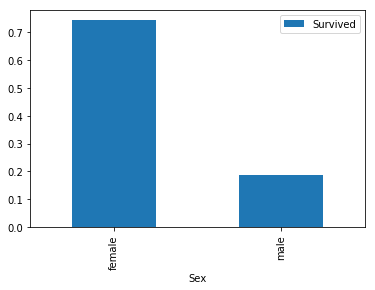

In [3]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

sex_pivot.plot.bar()
plt.show()

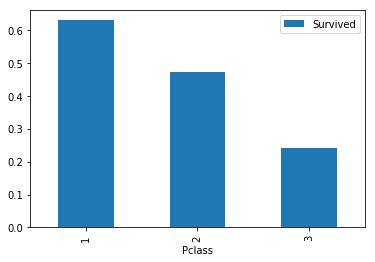

In [4]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()
plt.show()

In [5]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
train[train["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


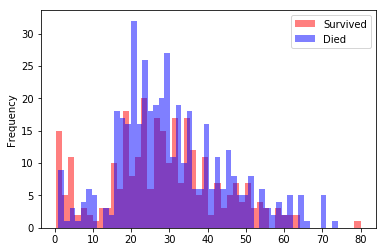

In [7]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

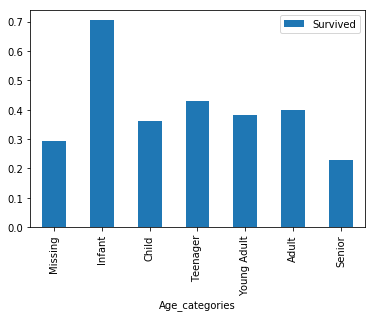

In [8]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

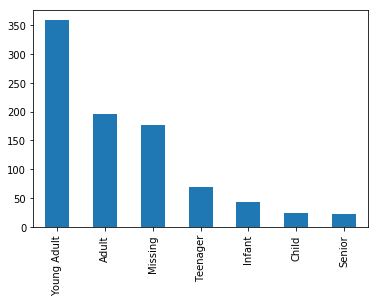

In [9]:
train['Age_categories'].value_counts().plot.bar()
plt.show()

In [10]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [12]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1


In [13]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [15]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [16]:
columns

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Age_categories_Missing',
 'Age_categories_Infant',
 'Age_categories_Child',
 'Age_categories_Teenager',
 'Age_categories_Young Adult',
 'Age_categories_Adult',
 'Age_categories_Senior']

## Splitting the training data

In [17]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2)

In [18]:
train_X.shape

(712, 12)

In [28]:
all_X.shape

(891, 12)

## convert to torch

In [19]:
trainX = th.tensor(train_X.values)

In [25]:
trainX.shape

torch.Size([712, 12])

In [21]:
testX = th.tensor(test_X.values)
trainY = th.tensor(train_y.values)
testY = th.tensor(test_y.values)

## Logistic Regression

In [22]:
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [45]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
# Instantiate Model Class
input_dim = trainX.shape[1] # number of input columns
output_dim = 2  # survived or not

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate)

In [46]:
# Traning the Model
batch_size = 4
batches = 178
num_epochs = 100

loss_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i in range(batches):
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        start = i * batch_size
        end = start + batch_size
        outputs = model(trainX[start:end].float())
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, trainY[start:end].long())
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Prediction
        with th.no_grad(): 
            model.eval()
            # Predict test dataset
            outputs = model(testX.float())
                
            # Get predictions from the maximum value
            outputs = th.max(outputs, 1)[1]
            accuracy = th.mean((outputs == testY.long()).float())
            print('Accuracy {:.2f}'.format(accuracy * 100.0))
            accuracy_list.append(accuracy)
        model.train()
            
        # store loss
        loss_list.append(loss.data)

Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 40.22
Accuracy 4

Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 64.80
Accuracy 6

Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 69.83
Accuracy 6

Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 72.63
Accuracy 74.86
Accuracy 75.42
Accuracy 72.63
Accuracy 72.63
Accuracy 7

Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 78.77
Accuracy 7

Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 83.80
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 84.36
Accuracy 8

In [48]:
len(accuracy_list)

17800

In [49]:
len(loss_list)

17800

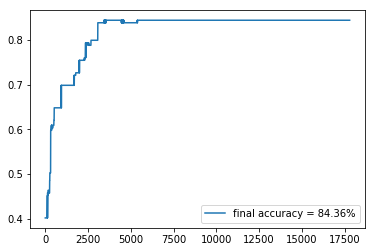

In [56]:
plt.plot(range(len(accuracy_list)),accuracy_list)
plt.legend(['final accuracy = {:.2f}%'.format(accuracy * 100.0)])
plt.show()